## 1. Upload do Dataset

In [11]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample.csv


# 2. Importando bibliotecas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3. Leitura e exploração inicial da base

In [36]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')  #Encoding utilizado para evitar erros com acentos
df.head(5)  #Mostra as 5 primeiras linhas


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [14]:
print(df.shape)

(2823, 25)


# 4. Tipos de dados

Foram encontrados os seguintes tipos de dados:

- int64
- float64
- object


In [15]:
print(df.dtypes) #Análise dos tipos de dados de cada coluna
print(df.columns) #Análise dos nomes das colunas

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
 

## 5. Uso de Listas, Tuplas e Dicionários

Lista

In [16]:
#Lista: coluna de texto/categórica
nomes = list(df['COUNTRY'])
for nome in nomes[:5]:
  print(nome)
#Lista com os 5 primeiros países

USA
France
France
USA
USA


Dicionário

In [17]:
#Dicionário: chave e valor
dicionario = dict(zip(df['COUNTRY'][:3], df['PRODUCTLINE'][:3]))
print(dicionario)

{'USA': 'Motorcycles', 'France': 'Motorcycles'}


Tupla

In [18]:
#Tupla: informação de uma linha
linha0 = df.iloc[0]
minha_tupla = (linha0['COUNTRY'], linha0['PRODUCTLINE'], linha0['PRICEEACH'])
print(minha_tupla)

('USA', 'Motorcycles', np.float64(95.7))


**Insight ao utilizar a lista, dicionário e tupla:** Percebi que entre os 5
primeiros países, ao utulizar a lista, há uma repetição de USA e França. Em uso do dicionário, pecebi que em ambos os países houve também uma repetição de produto, sendo destacado o produto Motocicleta. Além disso, mediante análise, pude constatar pela tupla o valor de cada Motocicleta.

# 6. Uso de Estruturas Condicionais e Laços

In [25]:
#Uilização de estruturas condicionais e laços
coluna_numerica = 'SALES'
primeiro_valor = df[coluna_numerica][0]

if primeiro_valor > 1500:
    print("Valor alto")
elif primeiro_valor > 2000:
    print("Valor intermediário")
else:
    print("Valor baixo")

# For para somar os 10 primeiros valores encontrados
soma = 0
lista = list(df[coluna_numerica][:10])
for n in lista:
    soma += n
print("Soma dos 10 primeiros valores:", soma)

# While: Encontrar o primeiro valor maior que 2500
limite = 2500
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 10.")

Valor alto
Soma dos 10 primeiros valores: 36840.04
Primeiro valor > 2500 encontrado: 2871.0


**Insight observado:** Usando as condições, foi possível descobrir que os valores de quantidade de vendas são altos, sendo encontrada a soma dos 10 primeiros valores no equivalente a 36840.04. Com o laço while, foi possível detectar que a menor valor de vendas, superior a 2500, é de 2871.0.

# 7. Uso de Operadores Aritméticos e Manipulação de Dados

In [29]:
if 'PRICEEACH' in df.columns:
    df['Desconto'] = df['PRICEEACH'] * 0.9
    print(df[['PRICEEACH', 'Desconto']].head())

   PRICEEACH  Desconto
0      95.70    86.130
1      81.35    73.215
2      94.74    85.266
3      83.26    74.934
4     100.00    90.000


**Insight:** Criação de uma coluna de desconto para análise do preço de cada item em valor cheio e valor descontado.

# 8. Uso de Numpy e Arrays Númericos

In [40]:
array_sales = np.array(df['SALES'])

# Operações NumPy
array_somado = array_sales + 10 #Soma 10 em cada valor
array_quadrado = array_sales ** 2  #Eleva cada valor ao quadrado

print("5 primeiros valores do array original:")
print(array_sales[:5])

print("5 primeiros valores com +10:")
print(array_somado[:5])

print("5 primeiros valores ao quadrado:")
print(array_quadrado[:5])

print("Soma total dos valores de SALES:", array_sales.sum())
print("Média dos valores de SALES:", array_sales.mean())
print("Maior valor:", array_sales.max())
print("Menor valor:", array_sales.min())

print(f"Média de vendas: ${array_sales.mean():.2f}")

5 primeiros valores do array original:
[2871.   2765.9  3884.34 3746.7  5205.27]
5 primeiros valores com +10:
[2881.   2775.9  3894.34 3756.7  5215.27]
5 primeiros valores ao quadrado:
[ 8242641.      7650202.81   15088097.2356 14037760.89   27094835.7729]
Soma total dos valores de SALES: 10032628.85
Média dos valores de SALES: 3553.889071909316
Maior valor: 14082.8
Menor valor: 482.13
Média de vendas: $3553.89


**Insight:** Com o uso de arrays, foi possível chegar a média de venda, encontrando o valor de $3553.89

# 9. Acesso e Manipulação de Dados com Pandas

In [53]:
#Utiizando contagem com .value_counts()

print("Número de pedidos por país (COUNTRY):")
pedidos_por_pais = df['COUNTRY'].value_counts()
print(pedidos_por_pais)



Número de pedidos por país (COUNTRY):
COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64


In [51]:
#Utilizando agrupamento para verificar o total de vendas por produto

print("Total de vendas por categoria de produto (PRODUCTLINE):")
vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print(vendas_por_categoria)

Total de vendas por categoria de produto (PRODUCTLINE):
PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


In [57]:
print("Países que mais geraram receita (TOP 5):")
vendas_por_pais_total = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print(vendas_por_pais_total.head())

Países que mais geraram receita (TOP 5):
COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Name: SALES, dtype: float64


In [55]:
print("Clientes com maior volume de compras (TOP 5):")
top_clientes = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(5)
print(top_clientes)

Clientes com maior volume de compras (TOP 5):
CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Name: SALES, dtype: float64


**Insight:** Mediante análise, é possível constatar que o Estados Unidos da América é país o que possui o maior número de pedidos, gerando o maior receita. Em segundo lugar, está a Espanha. O produto mais vendido está na categoria de Carros Clássicos e o cliente com o maior volume de compras é Euro Shopping Channel.

# 10. Visualização de Dados em Gráficos

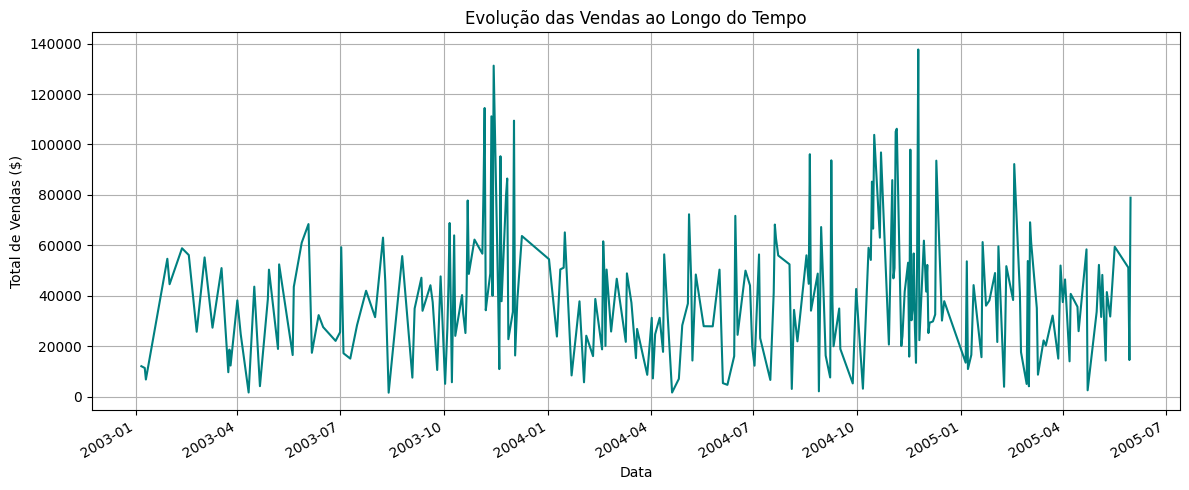

In [59]:
#GRÁFICO DE LINHA – Evolução de vendas ao longo do tempo

#Verificando se a coluna ORDERDATE é tipo data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

#Agrupando por data e somando as vendas
vendas_por_data = df.groupby('ORDERDATE')['SALES'].sum()

#Plotando gráfico de linha
plt.figure(figsize=(12,5))
vendas_por_data.plot(kind='line', color='teal')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📈 Gráfico de Linha – Vendas ao Longo do Tempo

O gráfico acima mostra como o volume total de vendas variou ao longo das datas dos pedidos. É possível observar picos e quedas que indicam sazonalidade ou promoções, sendo os maiores picos detectados nos períodos de final do ano.


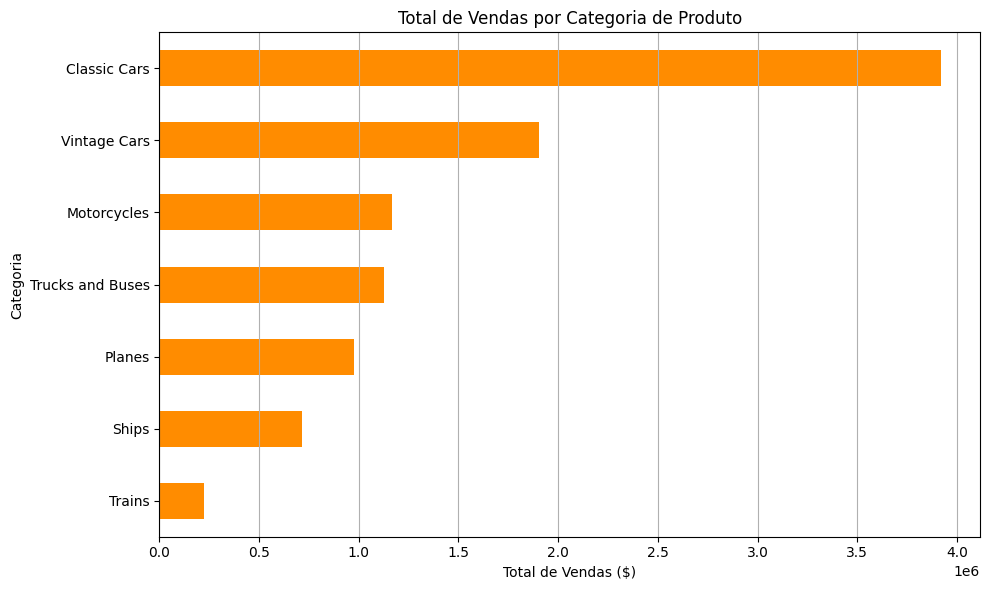

In [61]:
#GRÁFICO DE BARRAS – Vendas por Categoria de Produto

vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values()

#Plotando gráfico de barras
plt.figure(figsize=(10,6))
vendas_por_categoria.plot(kind='barh', color='darkorange')
plt.title('Total de Vendas por Categoria de Produto')
plt.xlabel('Total de Vendas ($)')
plt.ylabel('Categoria')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### 📊 Gráfico de Barras – Vendas por Categoria

Esse gráfico mostra quanto cada linha de produto (categoria) gerou em vendas. Podemos identificar quais categorias são as mais rentáveis para a empresa, merecendo o destaque para Carros Clássicos.


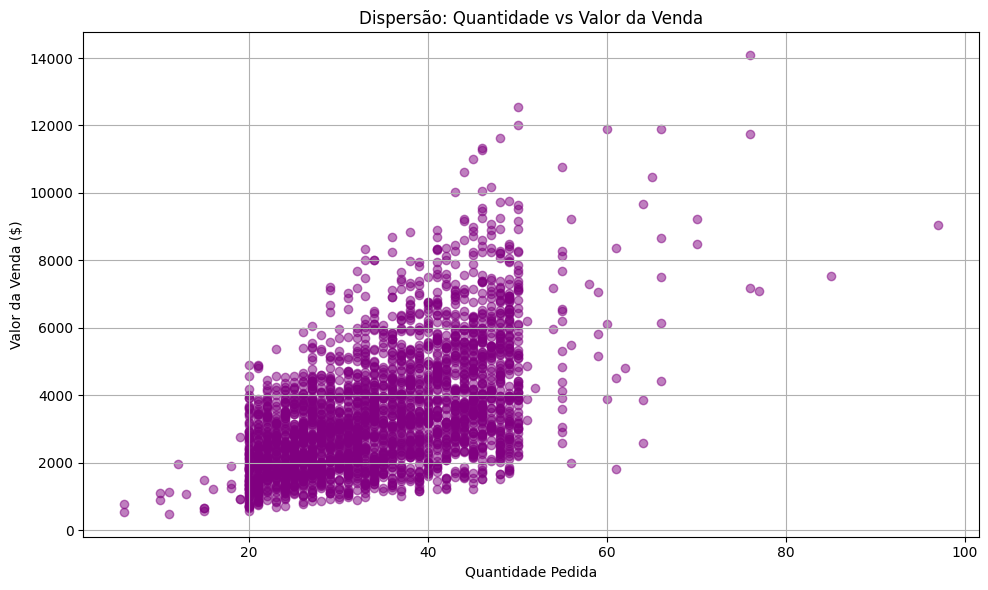

In [62]:
#GRÁFICO DE DISPERSÃO – Quantidade Pedida vs Valor da Venda

plt.figure(figsize=(10,6))
plt.scatter(df['QUANTITYORDERED'], df['SALES'], alpha=0.5, color='purple')
plt.title('Dispersão: Quantidade vs Valor da Venda')
plt.xlabel('Quantidade Pedida')
plt.ylabel('Valor da Venda ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

### ⚫ Gráfico de Dispersão – Quantidade vs Valor da Venda

Esse gráfico mostra a relação entre a quantidade de produtos pedidos e o valor da venda. Apesar de uma tendência, vemos que vendas de alto valor nem sempre estão associadas a grandes quantidades.


# 11. Relatório

#Relatório Final

Neste projeto, explorei a base **Sample Sales Data**, contendo **2823 linhas e 25 colunas**
O objetivo foi realizar uma análise exploratória básica utilizando recursos introdutórios de Python, NumPy, Pandas e Matplotlib.

##Descobertas e Padrões Interessantes

- Há vendas registradas em **diversos países**, com destaque para alguns como **USA, France e Germany**, que apresentaram volumes significativamente maiores.
- O cliente **(Euro Shopping Channel)** foi o que mais comprou em valor total, superando os demais com folga.
- A categoria de produto mais lucrativa foi **"Classic Cars"**, gerando um volume expressivo de vendas em comparação às demais linhas.
- Existe uma **relação visual clara entre a quantidade de produtos pedidos e o valor da venda**, mas com exceções curiosas: vendas muito altas também acontecem com quantidades relativamente pequenas (produtos mais caros).
- As **vendas ao longo do tempo** apresentaram flutuações, o que pode indicar sazonalidade, promoções específicas ou outros fatores externos.


##Conclusão

O exercício foi fundamental para consolidar conhecimentos iniciais sobre manipulação de dados e visualizações simples. Mesmo com ferramentas básicas, já foi possível gerar **insights valiosos** para entender melhor o comportamento de vendas da empresa.

Esse tipo de análise é o primeiro passo para decisões mais inteligentes e estratégicas baseadas em dados.

